# Project Python Foundations: FoodHub Data Analysis

**Marks: 60**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import warnings
warnings.filterwarnings('ignore')   # to avoid warnings

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [3]:
# Use info() to print summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 1898 rows and 9 columns


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: 1 float, 4 integers, and 4 objects


### **Question 3:**  'restaurant_name', 'cuisine_type', 'day_of_the_week' are object type attributes. Convert them to 'category' type. Does this result in reduced memory usage? (Check the info() function) [1 mark]

In [4]:
# Converting "objects" to "category"
df.restaurant_name = df.restaurant_name.astype('category')
df.cuisine_type = df.cuisine_type.astype('category')
df.day_of_the_week = df.day_of_the_week.astype('category')
# Use info() to print summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


#### Observations: 3 categories created and memory usage is reduced to 102.7+KB


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [5]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations: summary stats not should for categories
Min 20mins average 27.37 mins and maxium 35mins to prepare the order



### **Question 5:** How many orders are not rated? [1 mark]

In [7]:
df['rating'].value_counts()

Not given    736
5            588
4            386
3            188
Name: rating, dtype: int64

#### Observations: 736 orders with no rating given


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [3]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="orange"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [4]:
def labeled_barplot(data, feature, perc=False, n=None):

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="pastel",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

# Cost of the order

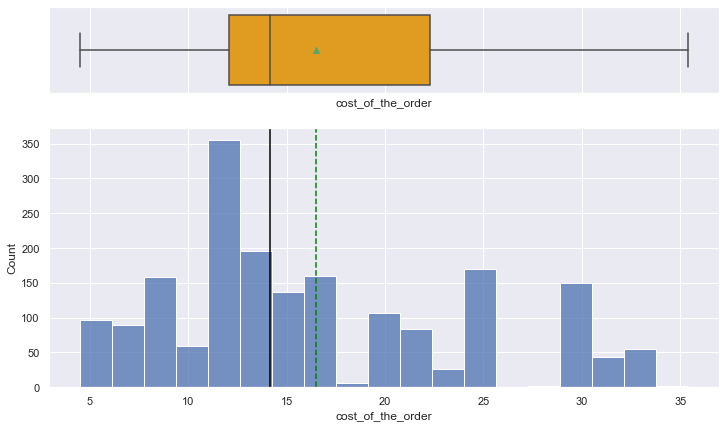

In [20]:
# Histogram boxplot for the 'cost of the order'
histogram_boxplot(df, 'cost_of_the_order')

####Observations : median cost of order is around 14 dollars, average is around $16, highest amount of orders are in around $12 range

# Food preparation time

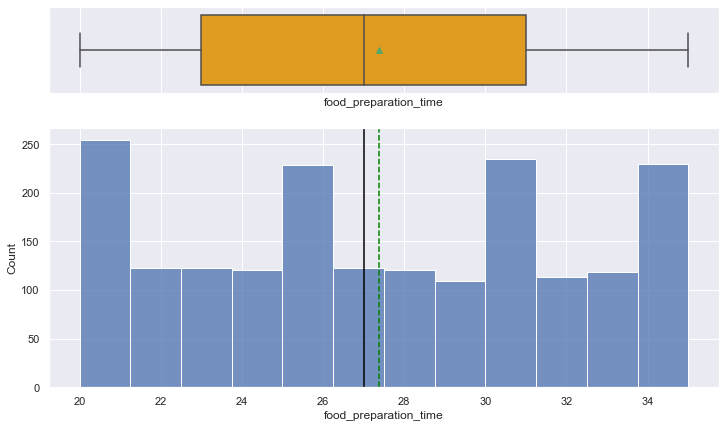

In [22]:
# histogram_boxplot for 'food_preparation_time' column
histogram_boxplot(df,'food_preparation_time')

####Obeservations: min 20min order time to max of 35 mins on median/average order times aroun 27mins

# Delivery time

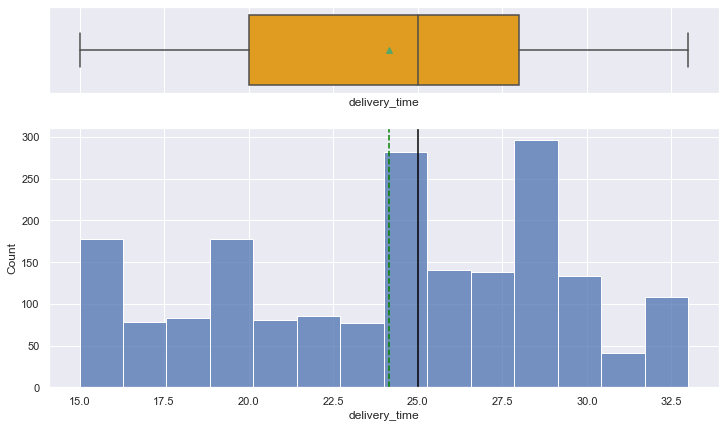

In [12]:
# histogram_boxplot for 'delivery_time' column
histogram_boxplot( df, 'delivery_time')

#### Observations: Min delivery time 15mins to maximum of 32.5Mins on average delivery times are around 23~24mins

# Cuisine Type

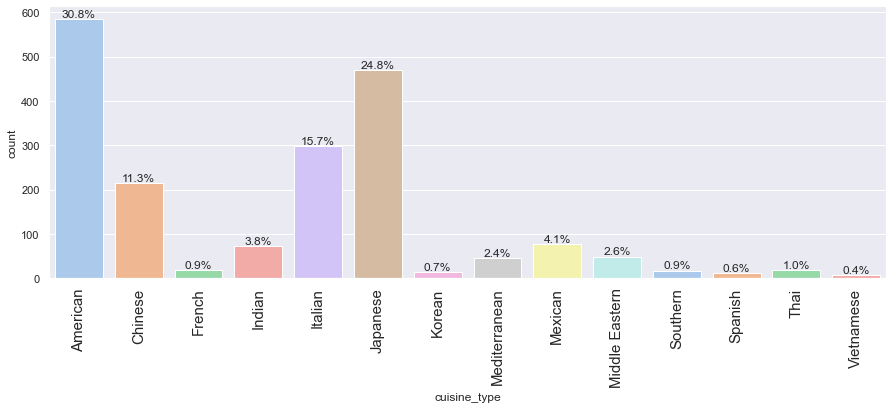

In [23]:
# labeled barplot for cuisine type
labeled_barplot(df, 'cuisine_type', perc=True)

#### Observations: most popular cuisine types are American,Japanese, Italian, and Chinese, American and Japanese represent over 55% of orders

# Day of the week

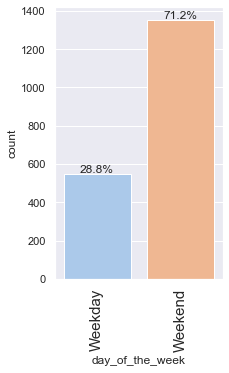

In [24]:
# labeled barplot for 'day of the week'
labeled_barplot(df, 'day_of_the_week', perc=True)

#### Observations: over 70% of orders are made during Weekends

# Rating

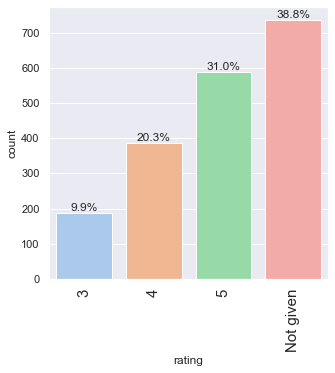

In [29]:
# labeled barplot for 'rating'
labeled_barplot(df, 'rating', perc=True)

#### Observations: over 50% of ratings show satisfactory rating, over 1/3 of orders are not rated

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [13]:
# count of ordrs by restaurant name
df['restaurant_name'].value_counts()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
                            ... 
Rohm Thai                      1
Hibino                         1
Woorijip                       1
Dos Caminos Soho               1
Frank Restaurant               1
Name: restaurant_name, Length: 178, dtype: int64

#### Observations: top 5 ordered restaurants are Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [14]:
df_weekend = df[df['day_of_the_week'] == 'Weekend'] #creat weekend filter
df_weekend['cuisine_type'].value_counts() #count values when order is on the weekend

American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Middle Eastern     32
Mediterranean      32
Thai               15
French             13
Southern           11
Korean             11
Spanish            11
Vietnamese          4
Name: cuisine_type, dtype: int64

#### Observations: American cusisine type is most popular cuisine on the weekends followed by Japanese and Italian


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [18]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20]
# calculate percentage
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100
# Print calculation output
print(round(percentage, 2), '%')

29.24 %


#### Observations: 29.24% of orders are above 20dollars


### **Question 10**: What is the mean order delivery time? [1 mark]

In [19]:
# summary table provides mean
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [22]:
# use mean function to calculate mean
mean_del_time = df['delivery_time'].mean()
print(round(mean_del_time, 2), 'minutes')

24.16 minutes


#### Observations:The mean delivery time for this dataset is 24.16 Mins.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [23]:
#count the number of orders by customer id, and show top5
df['customer_id'].value_counts().head()

52832     13
47440     10
83287      9
250494     8
65009      7
Name: customer_id, dtype: int64

#### Observations: customer id 52832,47440,83287,250494,65009 would qualify for 20% discount, most orders by customers are 13 orders


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


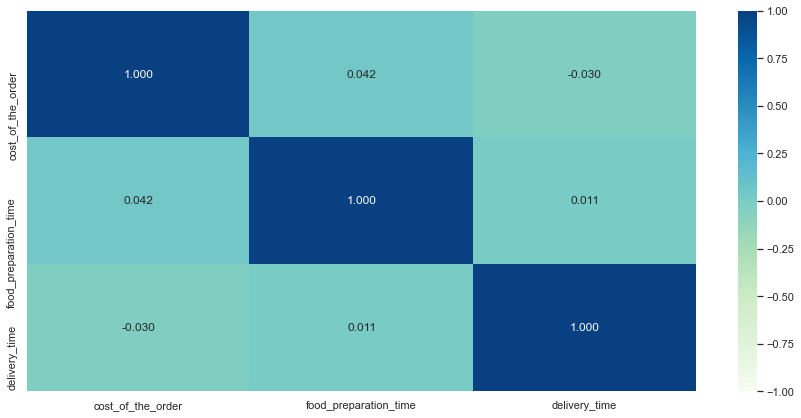

In [42]:
# Plot the heatmap to see the correlation
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".3f", cmap="GnBu")
plt.show()

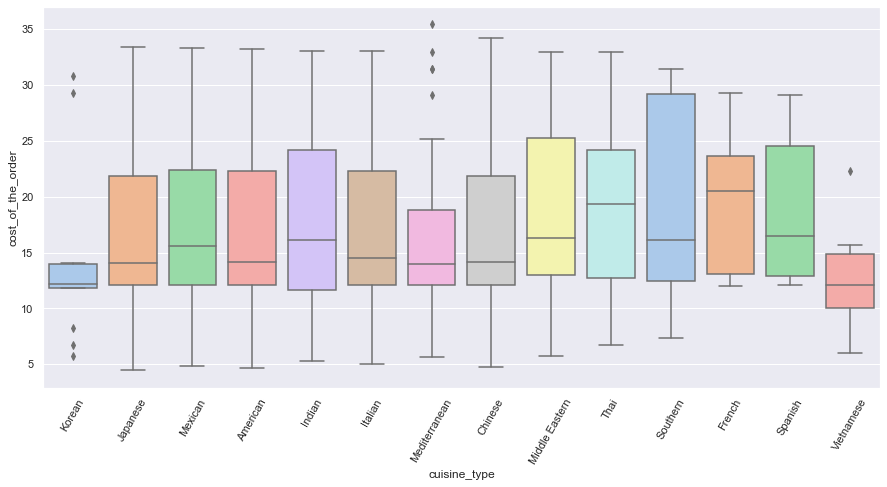

In [31]:
# Relationship between cuisine type and cost of order
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'pastel')
plt.xticks(rotation = 60)
plt.show()

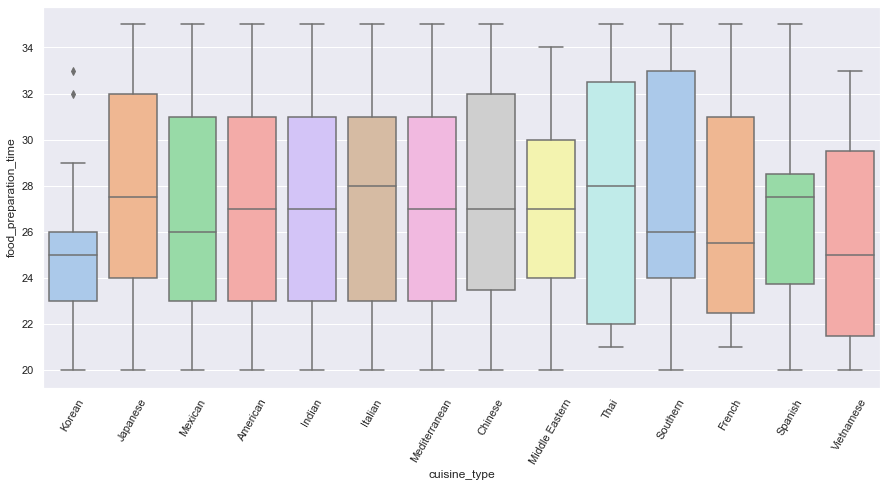

In [33]:
# Relationship between cuisine type and food prep time
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'pastel')
plt.xticks(rotation = 60)
plt.show()

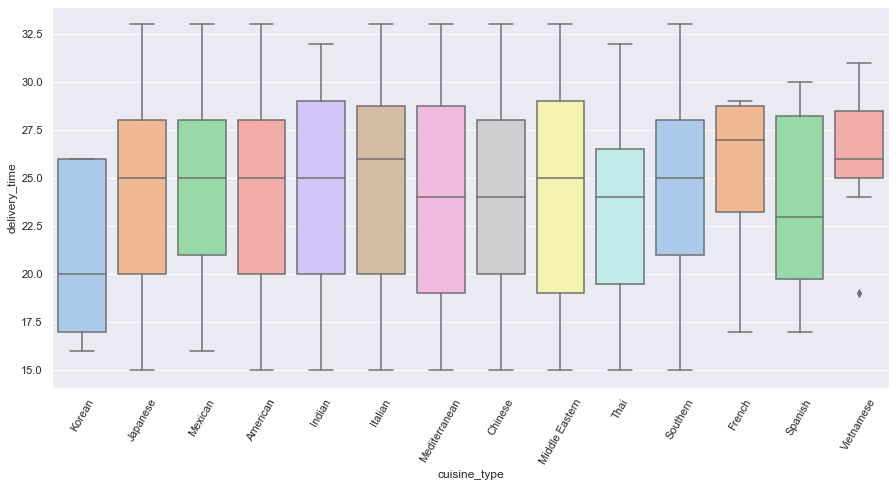

In [44]:
# Relationship between cuisine type and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "delivery_time", data = df, palette = 'pastel')
plt.xticks(rotation = 60)
plt.show()

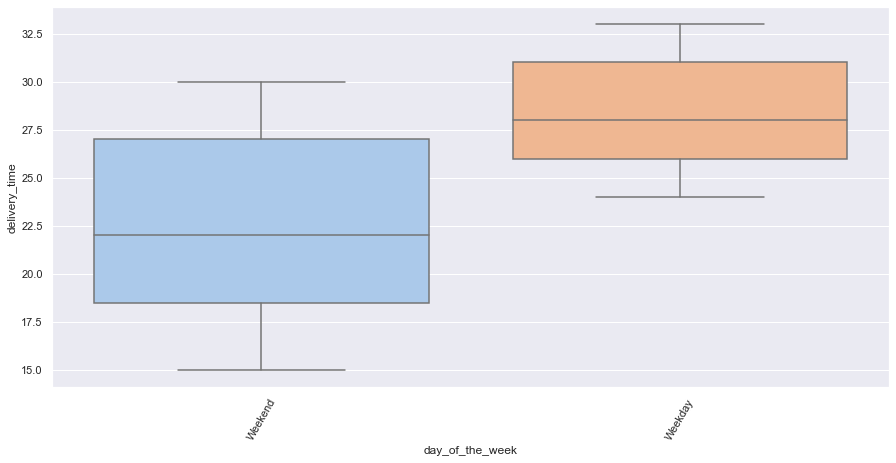

In [43]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'pastel')
plt.xticks(rotation = 60)
plt.show()

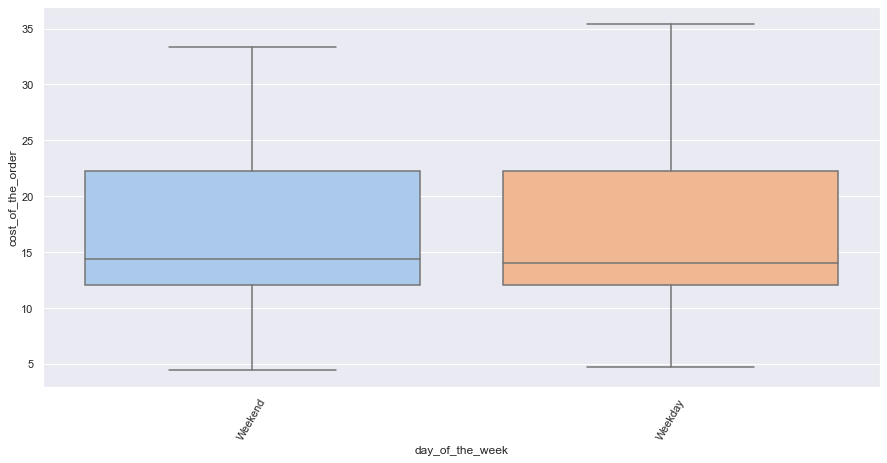

In [45]:
# Relationship between day of the week and cost of the order
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "cost_of_the_order", data = df, palette = 'pastel')
plt.xticks(rotation = 60)
plt.show()

In [48]:
# total order $ by restaurants
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False)

restaurant_name
Shake Shack                   3579.53
The Meatball Shop             2145.21
Blue Ribbon Sushi             1903.95
Blue Ribbon Fried Chicken     1662.29
Parm                          1112.76
                               ...   
Market Table                     6.79
Wa Jeal                          6.74
Cipriani Le Specialita           5.92
Big Wong Restaurant _¤¾Ñ¼       5.92
Hunan Manor                      5.72
Name: cost_of_the_order, Length: 178, dtype: float64

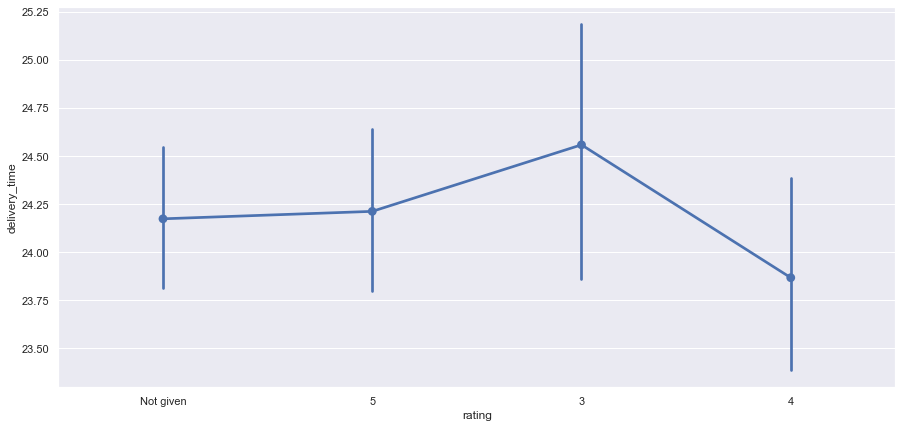

In [50]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

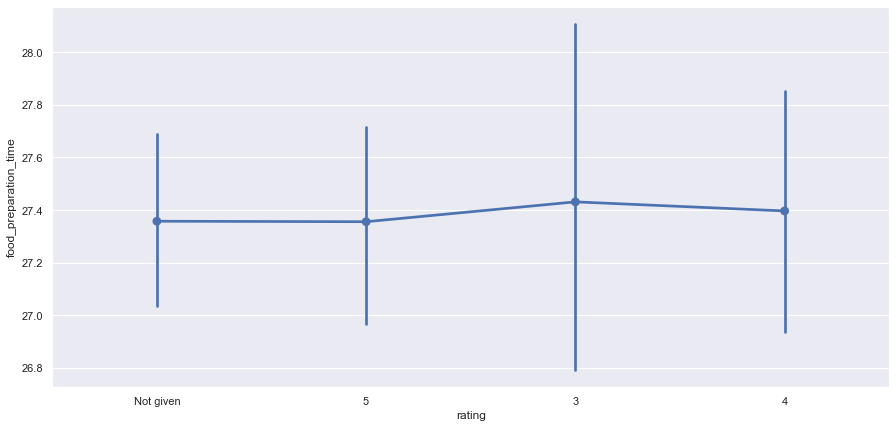

In [51]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

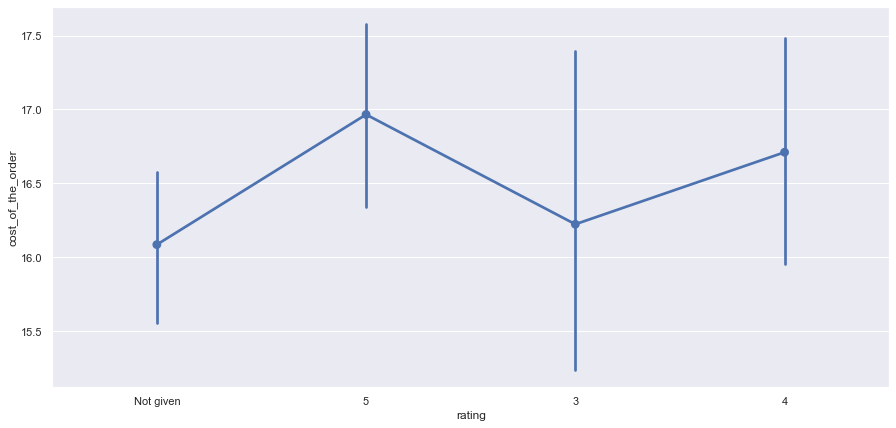

In [53]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [7]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')  

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head(10) 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41
5,Parm,39
6,RedFarm Hudson,34
7,TAO,28
8,Rubirosa,24
9,Nobu Next Door,23


In [18]:
df_rating_50 = df_rating_count[df_rating_count['rating']>50]['restaurant_name']
df_rating_50.head(10) 

0                  Shake Shack
1            The Meatball Shop
2            Blue Ribbon Sushi
3    Blue Ribbon Fried Chicken
Name: restaurant_name, dtype: object

In [19]:
avg_rating = df_rated.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending=False).reset_index()
avg_rating.head(10) 

,restaurant_name,rating
0,'wichcraft,5.0
1,Ravagh Persian Grill,5.0
2,Chola Eclectic Indian Cuisine,5.0
3,Chote Nawab,5.0
4,Junoon,5.0
5,Socarrat Paella Bar,5.0
6,DespaÌ±a,5.0
7,Dig Inn Seasonal Market,5.0
8,Saravanaa Bhavan,5.0
9,Donburi-ya,5.0


In [21]:
avg_rating[avg_rating['restaurant_name'].isin(df_rating_50)].head(10)

,restaurant_name,rating
66,The Meatball Shop,4.511905
89,Blue Ribbon Fried Chicken,4.328125
93,Shake Shack,4.278195
101,Blue Ribbon Sushi,4.219178


#### Observations: 4 restaurant above would qualify for the promotional offer


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [98]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [99]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


#### Observations: Company net revenue is $6,166.30 dollars


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [106]:
df['total_time'] = df['food_preparation_time'] + df['delivery_time']
df_greater_than_60min = df[df['total_time']>60]
percentage_60min = (df_greater_than_60min.shape[0] / df.shape[0]) * 100
print("Percentage of orders above 60mins:", round(percentage_60min, 2), '%')

Percentage of orders above 60mins: 10.54 %


#### Observations: 10.54% of orders take more than 60mins to get delivered


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [22]:
print('The mean delivery time on weekdays is around', 
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')
print('The mean delivery time on weekend is around', 
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')

The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekend is around 22 minutes


#### Observations: The mean delivery time for weekday is around 28min vs weekend 22mins, weekends on average have shorter delivery time


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

#### Conclusions and Recommendations :  In order for the business to continue to operate successfully, ensure smooth operations during weekend and restaurants that handle American, Japanese, Italian and Chinese restaurants. Ensuring having more dispatch available in the area that have high orders such as Shake Shack, The Meatball shop, Blue Ribbon Sushi etc may be ones of those strategies. More than 1/3 of customers ordered dont provide rating and lack of low rating may suggest ones that are not giving rating may have had less enjoyable experience. Company may offer incentive for customer to leave rating on their orders to get more fullsome feedback on their service. One of reason for lower orders on weekday may be related to delivery time- work with restaurants with high food prep times on reducing this may improve order rates on weekdays and improve ratings. For those customers that are more sensitive to delivery times or cost company may provide cuisine suggestions - Korean food seem to be most cost friendly with lowest food prep time.